**Student Name:** Mandeep Singh Brar        
**Student Id:** 8989367     
**Course Name:** Machine Learning Programming       
**Course No:** PROG8245

# **Tidying**

Part of the data engineering process is data cleaning and tidying. What is done in those two processes, is trying to make the data more readable, and complete. This makes much easier to analyze, visualize, and train the data.


## **Data Tidying**

Making the data more organized, and readable is the result of applying data tidying. 

In this section two main pandas functions are used in data tidying those are `melt` and `pivot_table`.

Let's start by taking a look at the below dataframe, which represents the income ranges based on religion. This is part of the PEW research, which is famous in the US for conducting pollings and surveys on citizens.

When the following are satisfied:


1. Each variable forms a column
2. Each observation forms a row
3. Each type of observational unit forms a table

We can then say that our dataset is *tidy*.

First we need to import pandas to read csv datasets.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **PEW Research Dataset**

1. Start by Importing the dataset into a pandas dataframe.

In [2]:
# Load the PEW Research dataset
pew = pd.read_csv('Data/pew-raw.csv')

# Display the first few rows to confirm
pew.head()

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k
0,Agnostic,27,34,60,81,76,137
1,Atheist,12,27,37,52,35,70
2,Buddhist,27,21,30,34,33,58
3,Catholic,418,617,732,670,638,1116
4,Dont know/refused,15,14,15,11,10,35


2. Observe the dataset using the `loc`, `iloc`, `head`, or `tail` approaches

In [3]:
# Show the first 5 rows
display(pew.head())

# Show the last 5 rows
display(pew.tail())

# Use .iloc to view the first row
display(pew.iloc[0])

# Use .loc to view a specific row by index (e.g., index 2)
display(pew.loc[2])

# View a specific value (e.g., religion in row 1)
display(pew.loc[1, 'religion'])

# View a range of rows and columns using iloc
display(pew.iloc[0:3, 0:4])  # First 3 rows, first 4 columns

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k
0,Agnostic,27,34,60,81,76,137
1,Atheist,12,27,37,52,35,70
2,Buddhist,27,21,30,34,33,58
3,Catholic,418,617,732,670,638,1116
4,Dont know/refused,15,14,15,11,10,35


,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k
5,Evangelical Prot,575,869,1064,982,881,1486
6,Hindu,1,9,7,9,11,34
7,Historically Black Prot,228,244,236,238,197,223
8,Jehovahs Witness,20,27,24,24,21,30
9,Jewish,19,19,25,25,30,95


religion    Agnostic
 <$10k            27
 $10-20k          34
$20-30k           60
$30-40k           81
 $40-50k          76
$50-75k          137
Name: 0, dtype: object

religion    Buddhist
 <$10k            27
 $10-20k          21
$20-30k           30
$30-40k           34
 $40-50k          33
$50-75k           58
Name: 2, dtype: object

'Atheist'

,religion,<$10k,$10-20k,$20-30k
0,Agnostic,27,34,60
1,Atheist,12,27,37
2,Buddhist,27,21,30


***What does not seem right in the above dataframe?***

- Column names have extra spaces and inconsistent formatting like ' <$10k', ' $10-20k', ' $40-50k', etc.
- Column names start with non-Alphanumeric characters like <, $, or spaces which will lead to confusion.
- Some values might be strings instead of numeric. 
- Columns are actually categories (Not Values) like the income bracket columns (<$10k, $10-20k, etc.) are being treated as separate columns, but each column represents an income category with the count for each religion.

3. Try to make the column headers represent a variable not a value. For that, use the `melt` function.

In [4]:
# Use melt to convert wide to long format
pew_long = pew.melt(id_vars='religion', 
                    var_name='income', 
                    value_name='count')

# Show the first few rows of the reshaped DataFrame
print(pew_long.head(15))

                    religion    income  count
0                   Agnostic     <$10k     27
1                    Atheist     <$10k     12
2                   Buddhist     <$10k     27
3                   Catholic     <$10k    418
4          Dont know/refused     <$10k     15
5          Evangelical Prot      <$10k    575
6                     Hindu      <$10k      1
7   Historically Black Prot      <$10k    228
8          Jehovahs Witness      <$10k     20
9                    Jewish      <$10k     19
10                  Agnostic   $10-20k     34
11                   Atheist   $10-20k     27
12                  Buddhist   $10-20k     21
13                  Catholic   $10-20k    617
14         Dont know/refused   $10-20k     14


### **Billboard Dataset**

This dataset outlines data about the top hit songs on the Billboard list and the week from entrance that it was in the billboard with the ranking.

1. Read the dataset and store it in a pandas dataframe. Note that the usual utf-8 encoding does not work on this dataset. The reason behind this is that there might be characters that are not supported by `utf-8`.

The suggestion is to use for this dataset `unicode_escape` encoding. (converts all non-ASCII characters into their \uXXXX representations)

In [5]:
# Read the billboard dataset with unicode_escape encoding
billboard = pd.read_csv('Data/billboard.csv', encoding='unicode_escape')

2. Observe the first few rows of the dataset.

In [6]:
# Display the first five rows
print(billboard.head())

   year      artist.inverted                                  track  time  \
0  2000      Destiny's Child               Independent Women Part I  3:38   
1  2000              Santana                           Maria, Maria  4:18   
2  2000        Savage Garden                     I Knew I Loved You  4:07   
3  2000              Madonna                                  Music  3:45   
4  2000  Aguilera, Christina  Come On Over Baby (All I Want Is You)  3:38   

  genre date.entered date.peaked  x1st.week  x2nd.week  x3rd.week  ...  \
0  Rock   2000-09-23  2000-11-18         78       63.0       49.0  ...   
1  Rock   2000-02-12  2000-04-08         15        8.0        6.0  ...   
2  Rock   1999-10-23  2000-01-29         71       48.0       43.0  ...   
3  Rock   2000-08-12  2000-09-16         41       23.0       18.0  ...   
4  Rock   2000-08-05  2000-10-14         57       47.0       45.0  ...   

   x67th.week  x68th.week  x69th.week  x70th.week  x71st.week  x72nd.week  \
0         NaN  

***What is wrong with the above dataset?***

- Wide formatting each weeks ranking is seperated by different column name such as: (x1st.week, x2nd.week, ..., x76th.week). It makes us too hard to analyze the dataset.
- Their are lots of missing values as many songs dont stay on the chart for 76 weeks. As their are lots of NaNs. 
- Columns have inconsistent and awkward names like x1st.week, x2nd.week so on. 

3. Let's, again, use the `melt` function to fix the general structure of the dataframe.

In [7]:
# Melt the week columns into two columns: 'week' and 'rank'
week_cols = [col for col in billboard.columns if 'week' in col]
billboard_long = pd.melt(
    billboard,
    id_vars=['year', 'artist.inverted', 'track', 'time', 'genre', 'date.entered', 'date.peaked'],
    value_vars=week_cols,
    var_name='week',
    value_name='rank'
)

# Drop rows where rank is missing
billboard_long = billboard_long.dropna(subset=['rank'])

# Show the reshaped dataframe
billboard_long.head()


,year,artist.inverted,track,time,genre,date.entered,date.peaked,week,rank
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,x1st.week,78.0
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,x1st.week,15.0
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,x1st.week,71.0
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,x1st.week,41.0
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,x1st.week,57.0


If we inspect the current dataframe. We find that it is structured in a better way than before. 

However, the ***Week*** column looks a bit ugly!

4. Let's try to place only the week number in that column without the extras surronding it.

In [8]:
# Remove the extra text and keep only the week number
# e.g., 'x1st.week' -> '1', 'x10th.week' -> '10'
billboard_long['week'] = billboard_long['week'].str.extract(r'x(\d+)[a-z]{2}\.week')
billboard_long['week'] = billboard_long['week'].astype(int)

billboard_long.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,week,rank
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,1,78.0
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,1,15.0
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,1,71.0
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,1,41.0
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,1,57.0


5. Now let's inspect the ***Week*** column in the dataframe.

In [9]:
# Look at the unique values and data type of 'week'
print(billboard_long['week'].unique())
print(billboard_long['week'].dtype)

# Quick summary
billboard_long['week'].describe()


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65]
int64


count    5307.000000
mean       11.470699
std         9.001300
min         1.000000
25%         5.000000
50%        10.000000
75%        16.000000
max        65.000000
Name: week, dtype: float64

Next, let's try to find the date at which the song ranked the number that is shown per row.

6. To do that let's first think of the equation that is going to get us the relevant date at which the song ranked the *rth*.



In [10]:
# Convert 'date.entered' to datetime if not already
billboard_long['date.entered'] = pd.to_datetime(billboard_long['date.entered'])

# Calculate the date for each week
billboard_long['date'] = billboard_long['date.entered'] + pd.to_timedelta(billboard_long['week'] - 1, unit='W')


*Timedeltas are absolute differences in times, expressed in difference units (e.g. days, hours, minutes, seconds). This method converts an argument from a recognized timedelta format / value into a Timedelta type.*


***What is the problem with the calculation above?***

Problem: If the date.entered value is missing or not a valid date, the resulting date will also be NaT (not a time).

Another issue: Not all weeks are exactly 7 days long (due to months/years, leap years), but for chart data, "weeks" are fine as 7-day units.

7. Let's only keep necessary columns

In [11]:
columns_to_keep = ['year', 'artist.inverted', 'track', 'genre', 'week', 'date', 'rank']
billboard_final = billboard_long[columns_to_keep].copy()


8. How to rename your columns?

In [12]:
# Example: Rename columns for easier access
billboard_final = billboard_final.rename(columns={
    'artist.inverted': 'artist',
    'track': 'song',
    'rank': 'chart_position'
})

Display the dataframe

In [13]:
billboard_final.head()

,year,artist,song,genre,week,date,chart_position
0,2000,Destiny's Child,Independent Women Part I,Rock,1,2000-09-23,78.0
1,2000,Santana,"Maria, Maria",Rock,1,2000-02-12,15.0
2,2000,Savage Garden,I Knew I Loved You,Rock,1,1999-10-23,71.0
3,2000,Madonna,Music,Rock,1,2000-08-12,41.0
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),Rock,1,2000-08-05,57.0


In the above dataframe, there are some *NaN* values. What are we going to do? <br/>
9. Apply quick data cleaning and then observe the dataset

In [14]:
# Drop rows with any NaN values
billboard_clean = billboard_final.dropna()

# Check the cleaned dataframe
print(billboard_clean.head())
print(billboard_clean.info())


   year               artist                                   song genre  \
0  2000      Destiny's Child               Independent Women Part I  Rock   
1  2000              Santana                           Maria, Maria  Rock   
2  2000        Savage Garden                     I Knew I Loved You  Rock   
3  2000              Madonna                                  Music  Rock   
4  2000  Aguilera, Christina  Come On Over Baby (All I Want Is You)  Rock   

   week       date  chart_position  
0     1 2000-09-23            78.0  
1     1 2000-02-12            15.0  
2     1 1999-10-23            71.0  
3     1 2000-08-12            41.0  
4     1 2000-08-05            57.0  
<class 'pandas.core.frame.DataFrame'>
Index: 5307 entries, 0 to 20334
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   year            5307 non-null   int64         
 1   artist          5307 non-null   object        
 2   

## **Data Cleaning**

Data cleaning involves removing unwanted characters, imputing, or dropping missing values.

The decision is based on the dataset you have, and the information you can extract from the other columns.


Examples of data cleaning include cleaning:

1.   **Missing Data**
2.   **Irregular Data** (Outliers)
3.   **Unnecessary Data** — Repetitive Data, Duplicates and more
4.   **Inconsistent Data** — Capitalization, Addresses and more








### **Cars Data Set**

Start by reading the dataset related to car models: ./CSVs/cars.csv

In [15]:
import pandas as pd

# Read the CSV with 'unicode_escape' encoding to avoid character issues
cars_raw = pd.read_csv('./Data/cars.csv', sep=';')

# Show the first few rows to inspect the data
cars_raw.head(100)


,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,STRING,DOUBLE,INT,DOUBLE,DOUBLE,DOUBLE,DOUBLE,INT,CAT
1,Chevrolet Chevelle Malibu,NaN,8,307.0,130.0,3504.,12.0,70,US
2,Buick Skylark 320,15.0,8,350.0,NaN,3693.,11.5,70,US
3,Plymouth Satellite,NaN,8,318.0,150.0,3436.,11.0,70,US
4,AMC Rebel SST,16.0,8,NaN,150.0,NaN,12.0,70,US
...,...,...,...,...,...,...,...,...,...
95,Chevrolet Malibu,13.0,8,350.0,145.0,3988.,13.0,73,US
96,Ford Gran Torino,14.0,8,302.0,137.0,4042.,14.5,73,US
97,Dodge Coronet Custom,15.0,8,318.0,150.0,3777.,12.5,73,US
98,Mercury Marquis Brougham,12.0,8,429.0,198.0,4952.,11.5,73,US


First Row seems to be the datatype, we need to remove it

In [16]:
# Most likely, you want to drop index 0:
cars_data = cars_raw.drop(index=0).reset_index(drop=True)

# If you need to split the column by semicolon, do it here:
if cars_data.shape[1] == 1:
    cars = cars_data.iloc[:, 0].str.split(';', expand=True)
    cars.columns = ['Car', 'MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model', 'Origin']
else:
    cars = cars_data

# Show the first few rows to confirm
cars.head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,NaN,8,307.0,130.0,3504.,12.0,70,US
1,Buick Skylark 320,15.0,8,350.0,NaN,3693.,11.5,70,US
2,Plymouth Satellite,NaN,8,318.0,150.0,3436.,11.0,70,US
3,AMC Rebel SST,16.0,8,NaN,150.0,NaN,12.0,70,US
4,Ford Torino,17.0,8,302.0,140.0,3449.,10.5,70,US


Let's observe the columns with null values.  Either by using the `isnull().sum()` function 

In [17]:
# Check for missing values in each column
cars.isnull().sum()

Car             0
MPG             3
Cylinders       0
Displacement    1
Horsepower      2
Weight          1
Acceleration    0
Model           0
Origin          0
dtype: int64

There aren't many missing values. Let's take a glimpse at the percentage of the missing values:

**HINT:** We'll need `Numpy` for the below task.

In [18]:
import numpy as np

# Calculate the percentage of missing values per column
missing_percent = ((cars.isnull().sum() / len(cars)) * 100).round(2)

missing_percent


Car             0.00
MPG             0.74
Cylinders       0.00
Displacement    0.25
Horsepower      0.49
Weight          0.25
Acceleration    0.00
Model           0.00
Origin          0.00
dtype: float64

Around *0.19%* of the values are missing, which isn't a lot. Therefore, we might go with the option of dropping all the rows with null values.

In [19]:
# Drop all rows with any null values
cars_clean = cars.dropna()

# Show the shape and first few rows of the cleaned dataframe
print("Shape after dropping rows with nulls:", cars_clean.shape)
cars_clean.head()


Shape after dropping rows with nulls: (401, 9)


,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
4,Ford Torino,17.0,8,302.0,140.0,3449.,10.5,70,US
6,Chevrolet Impala,14.0,8,454.0,220.0,4354.,9.0,70,US
7,Plymouth Fury iii,14.0,8,440.0,215.0,4312.,8.5,70,US
8,Pontiac Catalina,14.0,8,455.0,225.0,4425.,10.0,70,US
9,AMC Ambassador DPL,15.0,8,390.0,190.0,3850.,8.5,70,US


Lets also check dropping the columns

In [20]:
# Drop columns with any null values
cars_no_null_cols = cars.dropna(axis=1)

# Show the shape and column names after dropping columns with missing values
print("Shape after dropping columns with nulls:", cars_no_null_cols.shape)
print("Columns remaining:", cars_no_null_cols.columns.tolist())


Shape after dropping columns with nulls: (406, 5)
Columns remaining: ['Car', 'Cylinders', 'Acceleration', 'Model', 'Origin']


Let's observe how many columns we lost

In [21]:
# Number of columns before dropping
original_column_count = cars.shape[1]

# Number of columns after dropping columns with missing values
after_drop_column_count = cars_no_null_cols.shape[1]

# Calculate the number of columns lost
columns_lost = original_column_count - after_drop_column_count

print(f"Original number of columns: {original_column_count}")
print(f"Number of columns after dropping those with nulls: {after_drop_column_count}")
print(f"Number of columns lost: {columns_lost}")


Original number of columns: 9
Number of columns after dropping those with nulls: 5
Number of columns lost: 4


### **Cars Dataset - Filling in missing values automatically**

Another option is to try and fill in the missing values through imputations.

Let's take the `MPG` column for example. We can fill in the missing values with 0s through the following line of code:

`df_cars.fillna(0) `. 

In [22]:
# Fill missing values in only the MPG column with 0
cars['MPG'] = cars['MPG'].fillna(0)

cars.head()


,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,0,8,307.0,130.0,3504.,12.0,70,US
1,Buick Skylark 320,15.0,8,350.0,NaN,3693.,11.5,70,US
2,Plymouth Satellite,0,8,318.0,150.0,3436.,11.0,70,US
3,AMC Rebel SST,16.0,8,NaN,150.0,NaN,12.0,70,US
4,Ford Torino,17.0,8,302.0,140.0,3449.,10.5,70,US


However, this does not make much sense as there isn't MPG equal to 0. How about we plot the MPG column and if it follows a random distribution we can use the mean of the column to compute the missing values. Otherwise, we can use the median (if there is a skewed normal distribution). However, there might be a better way of imputation which is getting the median or the mean of the MPG of the cars with similar attributes.

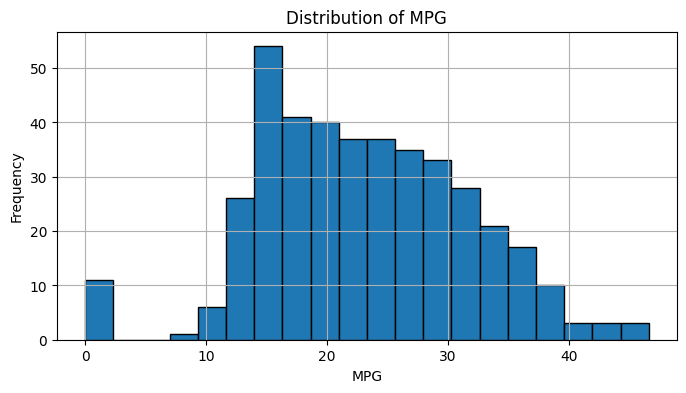

In [23]:
import matplotlib.pyplot as plt

# Plot a histogram of the MPG column (convert to numeric if not already)
plt.figure(figsize=(8, 4))
cars['MPG'] = pd.to_numeric(cars['MPG'], errors='coerce')
cars['MPG'].hist(bins=20, edgecolor='black')
plt.title('Distribution of MPG')
plt.xlabel('MPG')
plt.ylabel('Frequency')
plt.show()

If we observe the graph above, we can consider it in a way or another normally distributed. Therefore, we can impute the missing values using the mean.

To compute the mean we need numeric values. However the values in the dataframe are objects. Therefore, we need to change them to numerics so that we can compute them.

In [24]:
# Already done above, but if not:
cars['MPG'] = pd.to_numeric(cars['MPG'], errors='coerce')


Now let's see what is the mean of the MPG column

In [ ]:
mpg_mean = cars['MPG'].mean()

print("Mean MPG:", mpg_mean)


Mean MPG: 22.925615763546798


We can use this mean to compute the missing values since the graph demonstarted a normal distribution

In [34]:
# Select only numeric columns for imputation
numeric_df = cars.select_dtypes(include=['float64', 'int64'])

# Initialize the imputer with 'median' strategy
imputer = SimpleImputer(strategy='median')

# Fit and transform in one step
imputed_array = imputer.fit_transform(numeric_df)

# Put imputed values back into the original dataframe
cars[numeric_df.columns] = imputed_array

# Show result
print("Missing values filled using median imputation:")
display(cars.head())

Missing values filled using median imputation:


,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,23.564051,8,307.0,130.0,3504.,12.0,70,US
1,Buick Skylark 320,15.000000,8,350.0,NaN,3693.,11.5,70,US
2,Plymouth Satellite,23.564051,8,318.0,150.0,3436.,11.0,70,US
3,AMC Rebel SST,16.000000,8,NaN,150.0,NaN,12.0,70,US
4,Ford Torino,17.000000,8,302.0,140.0,3449.,10.5,70,US


### **Car Dataset - Simple Imputer**

*SimpleImputer* is a `scikit-learn` class which is helpful in handling the missing data in the predictive model dataset. It replaces the `NaN` values with a specified placeholder.
It is implemented by the use of the `SimpleImputer()` method which takes the following arguments :

`missing_values` : The missing_values placeholder which has to be imputed. By default is NaN

`strategy` : The data which will replace the NaN values from the dataset. The strategy argument can take the values – ‘mean'(default), ‘median’, ‘most_frequent’ and ‘constant’.


Let's start by importing the `SimpleImputer` into our notebook

In [27]:
from sklearn.impute import SimpleImputer
import numpy as np


What we need to do are two essential steps:

1. fit the data (compute the mean / median / most freq)
2. transform the data (place the computed values in the NaN cells)

In [28]:
# Make sure MPG is numeric
cars['MPG'] = pd.to_numeric(cars['MPG'], errors='coerce')

# Create the imputer (use mean strategy)
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')


In [33]:
# Convert '0' (both numeric 0 and string '0') to NaN
cars['MPG'] = cars['MPG'].replace(0, np.nan)       # For numeric 0
cars['MPG'] = cars['MPG'].replace('0', np.nan)     # For string '0', if present

# Now fill NaNs with the mean
mpg_mean = cars['MPG'].mean()
cars['MPG'] = cars['MPG'].fillna(mpg_mean)

# Show result
print("Missing values filled using median imputation:")
display(cars.head())

Missing values filled using median imputation:


,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,23.564051,8,307.0,130.0,3504.,12.0,70,US
1,Buick Skylark 320,15.000000,8,350.0,NaN,3693.,11.5,70,US
2,Plymouth Satellite,23.564051,8,318.0,150.0,3436.,11.0,70,US
3,AMC Rebel SST,16.000000,8,NaN,150.0,NaN,12.0,70,US
4,Ford Torino,17.000000,8,302.0,140.0,3449.,10.5,70,US


## **Outlier Detection** 


An Outlier is a data-item/object that deviates significantly from the rest of the (so-called normal)objects. They can be caused by measurement or execution errors. The analysis for outlier detection is referred to as outlier mining. There are many ways to detect the outliers, and the removal process is the data frame same as removing a data item from the panda’s data frame.



https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/





In [36]:
# Importing
import sklearn
from sklearn.datasets import load_diabetes
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
diabetics = load_diabetes()

# Create the dataframe
column_name = diabetics.feature_names
df_diabetics = pd.DataFrame(diabetics.data)
df_diabetics.columns = column_name
df_diabetics.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


### Outliers Visualization

#### Visualizing Outliers Using Box Plot
It captures the summary of the data effectively and efficiently with only a simple box and whiskers. Boxplot summarizes sample data using 25th, 50th, and 75th percentiles. One can just get insights(quartiles, median, and outliers) into the dataset by just looking at its boxplot.

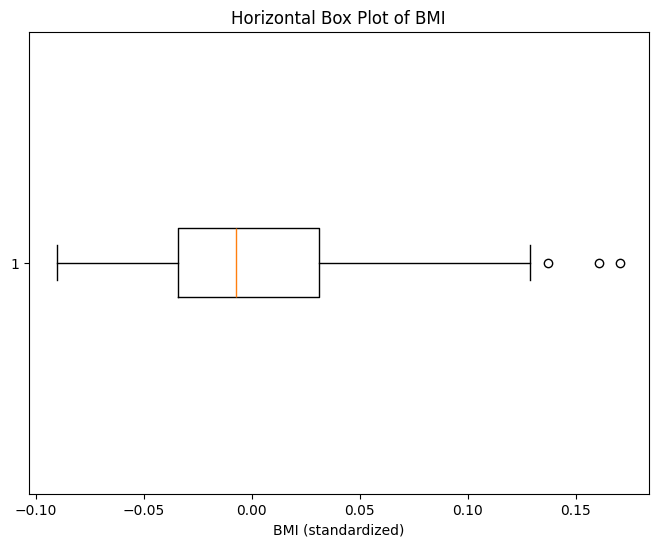

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.boxplot(df_diabetics['bmi'], vert=False)  # Horizontal box plot
plt.title('Horizontal Box Plot of BMI')
plt.xlabel('BMI (standardized)')
plt.show()


#### Visualizing Outliers Using ScatterPlot.

It is used when you have paired numerical data and when your dependent variable has multiple values for each reading independent variable, or when trying to determine the relationship between the two variables. In the process of utilizing the scatter plot, one can also use it for outlier detection.

#### Z-Score:
Z- Score is also called a standard score. This value/score helps to understand that how far is the data point from the mean. And after setting up a threshold value one can utilize z score values of data points to define the outliers.
<br>
Zscore = (data_point -mean) / std. deviation



Now to define an outlier threshold value is chosen which is generally 3.0. As 99.7% of the data points lie between +/- 3 standard deviation (using Gaussian Distribution approach).

Rows where Z value is greater than 2

#### IQR (Inter-Quartile Range)
Inter Quartile Range approach to finding the outliers is the most commonly used and most trusted approach used in the research field. <Br>
IQR = Quartile3 - Quartile1

To define the outlier base value is defined above and below dataset’s normal range namely Upper and Lower bounds, define the upper and the lower bound (1.5*IQR value is considered) :<br>
upper = Q3 + 1.5 * IQR <br>
lower = Q1 - 1.5 * IQR <br> 

- Removing the outliers:
For removing the outlier, one must follow the same process of removing an entry from the dataset using its exact position in the dataset because in all the above methods of detecting the outliers end result is the list of all those data items that satisfy the outlier definition according to the method used.